In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []
# Identify the nearest ity for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

584

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a51a985e5791fedf0cfe595b0ac56f4


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | ratnagiri
Processing Record 5 of Set 1 | sidi ali
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | birnin kebbi
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | zhigansk
Processing Record 13 of Set 1 | davidson
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | shar
Processing Record 17 of Set 1 | bonavista
Processing Record 18 of Set 1 | saint-augustin
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 2

Processing Record 40 of Set 4 | paamiut
Processing Record 41 of Set 4 | nemuro
Processing Record 42 of Set 4 | mahibadhoo
Processing Record 43 of Set 4 | hobyo
Processing Record 44 of Set 4 | jihlava
Processing Record 45 of Set 4 | barretos
Processing Record 46 of Set 4 | nouadhibou
Processing Record 47 of Set 4 | paita
Processing Record 48 of Set 4 | dolores
Processing Record 49 of Set 4 | cayenne
Processing Record 50 of Set 4 | irbil
Processing Record 1 of Set 5 | viedma
Processing Record 2 of Set 5 | dicamay
Processing Record 3 of Set 5 | newtownards
Processing Record 4 of Set 5 | nakatunguru
Processing Record 5 of Set 5 | dumai
Processing Record 6 of Set 5 | darlowo
Processing Record 7 of Set 5 | kahului
Processing Record 8 of Set 5 | santa barbara
Processing Record 9 of Set 5 | vostok
Processing Record 10 of Set 5 | ganzhou
Processing Record 11 of Set 5 | saskylakh
Processing Record 12 of Set 5 | mwaya
Processing Record 13 of Set 5 | sungaipenuh
Processing Record 14 of Set 5 | dai

Processing Record 29 of Set 8 | zhuanghe
Processing Record 30 of Set 8 | dingle
Processing Record 31 of Set 8 | svetlyy
Processing Record 32 of Set 8 | woodward
Processing Record 33 of Set 8 | parchim
Processing Record 34 of Set 8 | tukrah
Processing Record 35 of Set 8 | buala
Processing Record 36 of Set 8 | comodoro rivadavia
Processing Record 37 of Set 8 | taree
Processing Record 38 of Set 8 | mendoza
Processing Record 39 of Set 8 | callaguip
Processing Record 40 of Set 8 | namatanai
Processing Record 41 of Set 8 | christchurch
Processing Record 42 of Set 8 | yeniseysk
Processing Record 43 of Set 8 | ebeltoft
Processing Record 44 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 45 of Set 8 | mizdah
Processing Record 46 of Set 8 | nizhniy odes
Processing Record 47 of Set 8 | krasnoselkup
Processing Record 48 of Set 8 | kunming
Processing Record 49 of Set 8 | sinnamary
Processing Record 50 of Set 8 | lasa
Processing Record 1 of Set 9 | port elizabeth
Processing Record

Processing Record 18 of Set 12 | ballina
Processing Record 19 of Set 12 | rudnya
Processing Record 20 of Set 12 | kerman
Processing Record 21 of Set 12 | agadez
Processing Record 22 of Set 12 | ojinaga
Processing Record 23 of Set 12 | gornyy
Processing Record 24 of Set 12 | muzhi
Processing Record 25 of Set 12 | khromtau
Processing Record 26 of Set 12 | paso de los toros
Processing Record 27 of Set 12 | cumberland
Processing Record 28 of Set 12 | krutinka
Processing Record 29 of Set 12 | bumba
Processing Record 30 of Set 12 | sept-iles
Processing Record 31 of Set 12 | killybegs
Processing Record 32 of Set 12 | pasighat
Processing Record 33 of Set 12 | mamakan
Processing Record 34 of Set 12 | ormara
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Checking to make sure there are at least 500 cities
len(city_data)

541

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-7.80,68,38,6.98,GL,2022-01-27 18:48:37
1,Pevek,69.7008,170.3133,-29.42,99,29,2.93,RU,2022-01-27 18:51:00
2,Ratnagiri,16.9833,73.3000,72.37,57,0,7.05,IN,2022-01-27 18:51:00
3,Sidi Ali,36.0998,0.4206,52.21,54,95,10.80,DZ,2022-01-27 18:51:01
4,Vaini,-21.2000,-175.2000,81.90,81,100,15.10,TO,2022-01-27 18:51:01
5,Birnin Kebbi,12.4539,4.1975,75.15,17,0,9.17,NG,2022-01-27 18:51:01
6,Ushuaia,-54.8000,-68.3000,53.26,71,75,18.41,AR,2022-01-27 18:51:02
7,Severo-Kurilsk,50.6789,156.1250,25.20,72,99,33.31,RU,2022-01-27 18:51:02
8,Mataura,-46.1927,168.8643,43.48,77,100,2.04,NZ,2022-01-27 18:51:02
9,Puerto Ayora,-0.7393,-90.3518,78.76,71,93,9.71,EC,2022-01-27 18:51:03


In [11]:
# Reorder the columns for easier interpretation
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-01-27 18:48:37,77.4840,-69.3632,-7.80,68,38,6.98
1,Pevek,RU,2022-01-27 18:51:00,69.7008,170.3133,-29.42,99,29,2.93
2,Ratnagiri,IN,2022-01-27 18:51:00,16.9833,73.3000,72.37,57,0,7.05
3,Sidi Ali,DZ,2022-01-27 18:51:01,36.0998,0.4206,52.21,54,95,10.80
4,Vaini,TO,2022-01-27 18:51:01,-21.2000,-175.2000,81.90,81,100,15.10
5,Birnin Kebbi,NG,2022-01-27 18:51:01,12.4539,4.1975,75.15,17,0,9.17
6,Ushuaia,AR,2022-01-27 18:51:02,-54.8000,-68.3000,53.26,71,75,18.41
7,Severo-Kurilsk,RU,2022-01-27 18:51:02,50.6789,156.1250,25.20,72,99,33.31
8,Mataura,NZ,2022-01-27 18:51:02,-46.1927,168.8643,43.48,77,100,2.04
9,Puerto Ayora,EC,2022-01-27 18:51:03,-0.7393,-90.3518,78.76,71,93,9.71


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


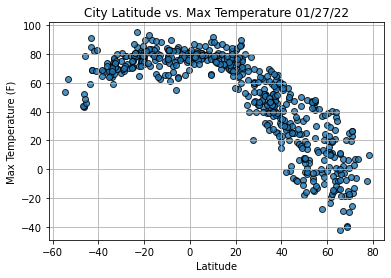

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

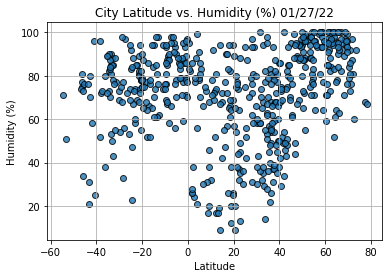

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

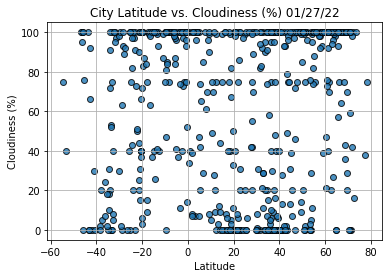

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

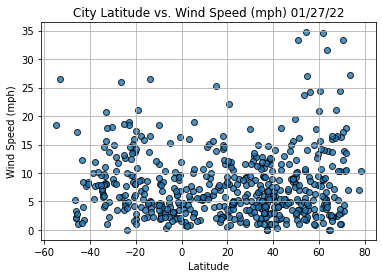

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show() 

In [19]:
# Testing loc method in city_data_df 
index13 = city_data_df.loc[13]
index13

City                    Cape Town
Country                        ZA
Date          2022-01-27 18:47:43
Lat                      -33.9258
Lng                       18.4232
Max Temp                    69.28
Humidity                       70
Cloudiness                     20
Wind Speed                    4.0
Name: 13, dtype: object

In [24]:
# Get Northern and Southern Hemisphere latitudes in separate data frames
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] < 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Vaini,TO,2022-01-27 18:51:01,-21.2000,-175.2000,81.90,81,100,15.10
6,Ushuaia,AR,2022-01-27 18:51:02,-54.8000,-68.3000,53.26,71,75,18.41
8,Mataura,NZ,2022-01-27 18:51:02,-46.1927,168.8643,43.48,77,100,2.04
9,Puerto Ayora,EC,2022-01-27 18:51:03,-0.7393,-90.3518,78.76,71,93,9.71
12,Rikitea,PF,2022-01-27 18:51:03,-23.1203,-134.9692,78.62,74,91,19.04
...,...,...,...,...,...,...,...,...,...
511,Port Augusta,AU,2022-01-27 19:04:35,-32.5000,137.7667,74.71,76,100,17.83
512,Marau,BR,2022-01-27 19:04:36,-28.4492,-52.2000,71.40,77,100,12.80
523,Hervey Bay,AU,2022-01-27 19:04:39,-25.2986,152.8535,69.91,69,100,13.18
524,Ballina,AU,2022-01-27 19:04:39,-28.8667,153.5667,69.98,98,63,8.14


In [25]:
# Assign new data frames to variables
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

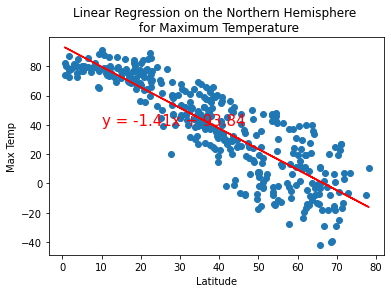

-0.866593066592897


In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                        'Max Temp',(10,40))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

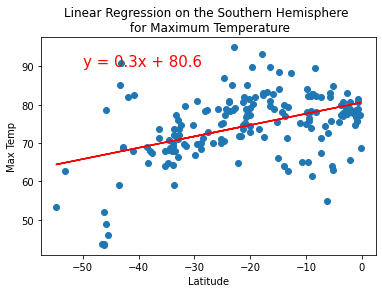

0.44198748975820296


In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

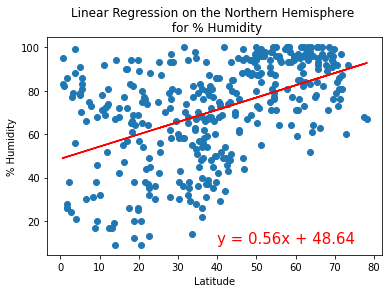

0.4774775658158359


In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(40,10))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

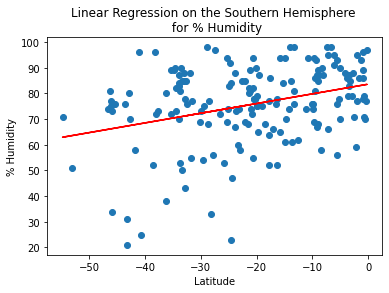

0.3258427210606995


In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

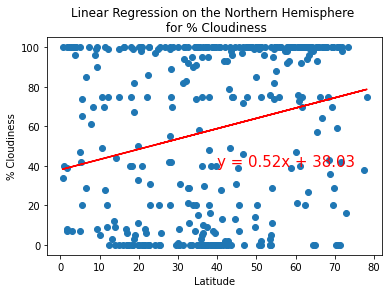

0.24313664801124774


In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(40,40))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

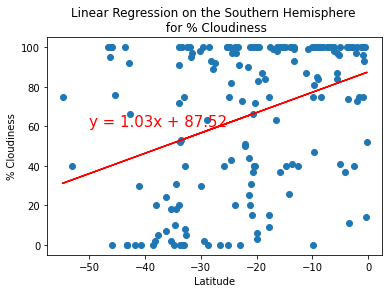

0.36697895264098956


In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

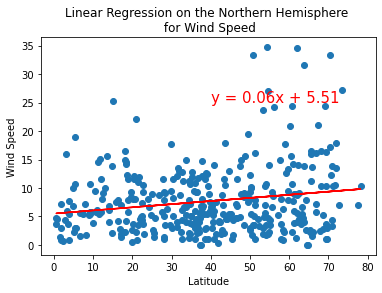

0.18016904613709897


In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(40,25))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

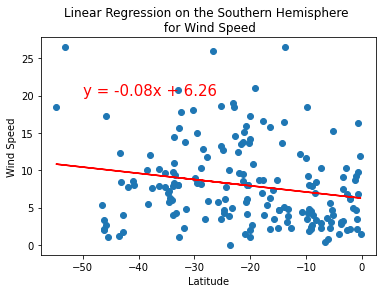

-0.2032905975401237


In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)